### 확률질량함수

In [4]:
import matplotlib as mpl
import matplotlib.pylab as plt
from scipy import stats # stats는 확률분포를 분석할 수 있는 다양한 기능 제공
import seaborn as sns
import numpy as np
import os
os.name

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')

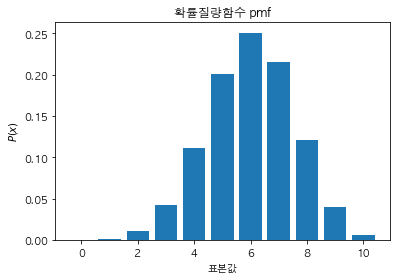

In [6]:
# 확률질량함수는 scipy의 stats 서브패키지에 binom 클래스로 구현
N = 10 # 전체 시도 횟수
mu = 0.6 # 베르누이 확률분포의 기댓값
rv = stats.binom(N, mu)
xx = np.arange(N + 1)

# 그래플르 표현할 때는 matplotlib 사용
plt.bar(xx, rv.pmf(xx), align = "center") # 확률질량함수(pmf) 사용
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("확률질량함수 pmf")
plt.show()

### 확률밀도함수

/Users/ChaeEun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ChaeEun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


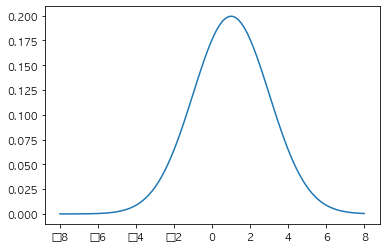

In [7]:
# 기댓값이 1이고 표준편차가 2인 정규분포 객체를 생성
rv = stats.norm()
rv = stats.norm(loc=1, scale=2)

# 확률분포 객체의 메서드 중 확률밀도함수(pdf)를 사용
x = np.linspace(-8, 8, 100)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.show()

### 정규분포

/Users/ChaeEun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ChaeEun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


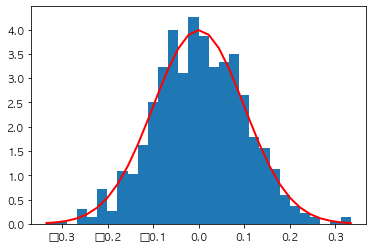

In [13]:
# 평균, 표준편차 정의
mu, sigma = 0, 0.1

# np.random.normal 함수를 사용하여 평균 0, 표준편차 0.1인 샘플 1000개를 추출
s = np.random.normal(mu, sigma, 1000)

# 샘플들의 histogram을 출력
# s: 배열 혹은 배열들로 구성된 시퀀스, 30: 해당 막대의 영역(bin)을 얼마나 채우는지 결정하는 변수
count, bins, ignored = plt.hist(s, 30, density=True)

# 샘플들을 이용해서 정규분포의 모양으로 출력
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins-mu)**2 / (2 * sigma**2)), linewidth = 2, color = 'r')
plt.show()

### 카이제곱분포

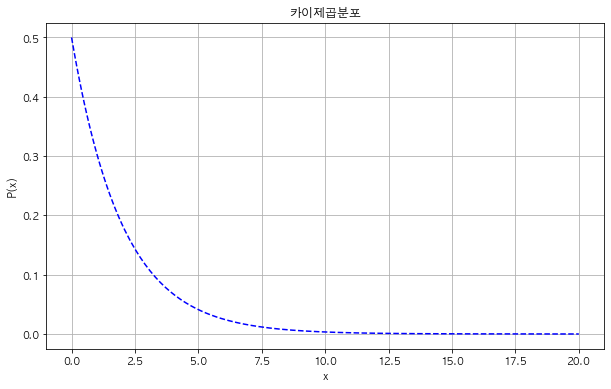

In [15]:
from numpy import linspace
from scipy.stats import chi2

df = 2 # 자유도
x = linspace(0, 20, 201) # 0부터 20까지 구간 201개로 분할
y = chi2(df).pdf(x) # 카이제곱분포의 확률밀도함수 시각화

# 샘플들을 이용해서 그래프로 출력
plt.figure(figsize = (10, 6))

plt.plot(x, y, 'b--')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid()
plt.title('카이제곱분포')
plt.show()

### 이항분포

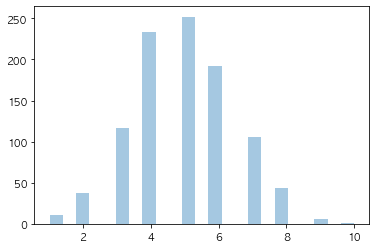

In [17]:
from numpy import random
# 이항분포에서 무작위 표본을 추출
# n: 적용할 범위 (예를 들어 동전의 앞/뒤일 경우 0과 1이므로 1로 설정)
# p: 각 n에 대해 나올 확률
# size: 횟수(배열의 크기)
sns.distplot(random.binomial(n = 10, p = 0.5, size = 1000), hist = True, kde = False)

# 샘플들을 이용해서 그래프로 출력
plt.show()

### 푸아송분포

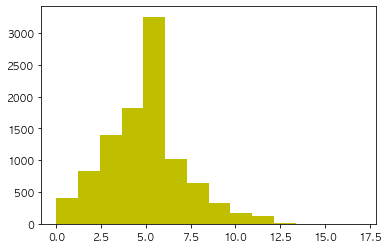

In [18]:
# np.random.poisson 함수를 사용해서 사건의 평균 횟수인 람다(lambda)가 5인 푸아송분포에서 난수 10000개를 생성
s = np.random.poisson(5, 10000)

# 샘플들의 histogram을 출력
count, bins, ignored = plt.hist(s, 14, color = 'y')
plt.show()

### t-test, 임계치

In [19]:
# 난수 발생을 위한 시드(seed) 1을 부여 (코드를 실행할 때마다 똑같은 난수 생성)
np.random.seed(1)

# 평균 178, 표준편차 5로 임의의 높이 20개를 생성
heights = [178 + np.random.normal(0, 5) for _ in range(20)]

# t-검정 수행
tTestResult = stats.ttest_1samp(heights, 173)

print("The T-statistic is %.3f and the p-value is %.3f" %tTestResult)

The T-statistic is 3.435 and the p-value is 0.003


### 성능 평가 - 혼동행렬 정확도, 정밀도, 재현율

In [21]:
import sklearn.metrics as metrics

y = np.array([1, 1, 1, 1, 0, 0]) # 0은 정상, 1은 암환자
p = np.array([1, 1, 0, 0, 0, 0]) # 예측 값

# sklearn.metrics를 이용하여 정확도, 정밀도, 재현율, F1 스코어 계산
print("accuracy", metrics.accuracy_score(y, p)) # 정확도
print("precision", metrics.precision_score(y, p)) # 정밀도
print("recall", metrics.recall_score(y, p)) # 재현율
print("f1", metrics.f1_score(y, p)) # F1 스코어

# 정확도, 정밀도, 재현율, F1 스코어 한번에 출력
print(metrics.classification_report(y, p))
print(metrics.confusion_matrix(y, p)) # 첫 행에서 실제로 0인 데이터 두 개를 정확하게 0으로 예측했다는 의미이며, 두 번째 행은 실제로 1인 데이터 네 개중 두 개만 1로 예측했다는 의미

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


### 성능 평가 - ROC 커브 구현

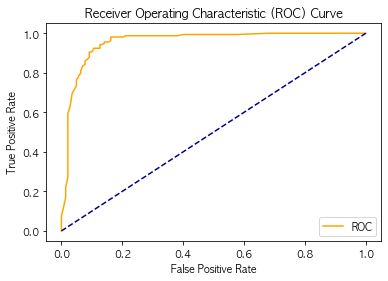

In [22]:
# 분류 알고리즘과 ROC 커프 라이브러리 호출
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC 커블르 위한 함수 정의
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# 샘플 데이터를 1000건 생성
data_X, class_label = make_classification(n_samples = 1000, n_classes = 2, weights = [1, 1], random_state = 1)

# 임의로 생성된 데이터를 학습과 테스트로 분리
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size = 0.3, random_state = 1)

# 학습 데이터를 랜덤포레스트 모델에 적용
model = RandomForestClassifier()
model.fit(trainX, trainy)

# 테스트 데이터의 확률을 예측
probs = model.predict_proba(testX)

# positive class만 유지 (positive class: 모델이 찾고자 하는 클래스)
probs = probs[:, 1]

# AUC 계산
auc = roc_auc_score(testy, probs)

# ROC 곡선 확보
fpr, tpr, thresholds = roc_curve(testy, probs)

# 정의된 함수를 사용하여 ROC 곡선을 생성
fpr, tpr, thresholds = roc_curve(testy, probs)
plot_roc_curve(fpr, tpr)